# 📊 Exploratory Data Analysis (EDA)  📊
##         Piparo Federico

---


## Consigna: 📂

Debes realizar un análisis exploratorio de los datos en un notebook. Tienen que estar tus pasos documentados con claridad, con las conclusiones correspondientes en cada gráfico empleado y análisis de lo que vas observando, utilizando celdas Markdown para tal fin. La prolijidad del notebook será un aspecto a evaluar. Es importante que tengas en cuenta que, en muchas oportunidades y trabajos, un EDA constituye un entregable en sí mismo. En esta línea, hay varios aspectos indispensables que deben ser abordados en cualquier Análisis Exploratorio de Datos y tomaremos como punto de partida para evaluar tu performance en este apartado. Entre estos aspectos destacados se encuentran: búsqueda de valores faltantes, valores atípicos/extremos u outliers y registros duplicados. Asimismo, la utilización de gráficos coherentes según la tipología de variable que corresponda resulta esencial.

---

En este caso asumiremos el rol de un `Data analist`, para le empresa `"Henry Telecom"`, una empresa nueva en el sector de las telecomunicaciones en Argentina  


## Análisis Básicos (generales):


Lo primero será cargar las tablas en DataFrames. Trabajaremos con el documento obligatorio `Internet.xlsx` (al menos en esta primera instancia), que cuenta con 15 hojas. La primera decisión que tomé fue convertir cada una de estas hojas en un DataFrame individual, en lugar de trabajar con todo como un único DataFrame. Aunque algunos análisis podrían hacerse considerando todas las hojas juntas, creo que de esta manera tendré menos complicaciones a la hora de realizar análisis más profundos, por lo que me parece más inteligente trabajarlos por separado desde un comienzo. Aun que para estos análsis básicos, seguramente utilizaremos el conjunto de Dataframes, para comparar estos valores

Algunas de las hojas tenían nombres con espacios entre palabras, lo que dificultaba llamar a los DataFrames posteriormente. Por ello, manualmente cambié los espacios por guiones bajos ( _ ).








### importacion de librerias:

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #librería para graficos
import seaborn as sns  

Cargamos  `Internet.xlsx` (cada hoja en un DF diferente con su propio nombre)

In [42]:


# Cargar el archivo Excel con todas las hojas
excel_file = 'C:\\Users\\fede\\Desktop\\LABs 2\\tablas\\Internet.xlsx'
dfs = pd.read_excel(excel_file, sheet_name=None)

# Crear un DataFrame individual para cada hoja y asignarlo a una variable
for sheet_name, dataframe in dfs.items():
    globals()[f'DF_{sheet_name}'] = dataframe


### Chequeo de nulos y ceros(faltantes):

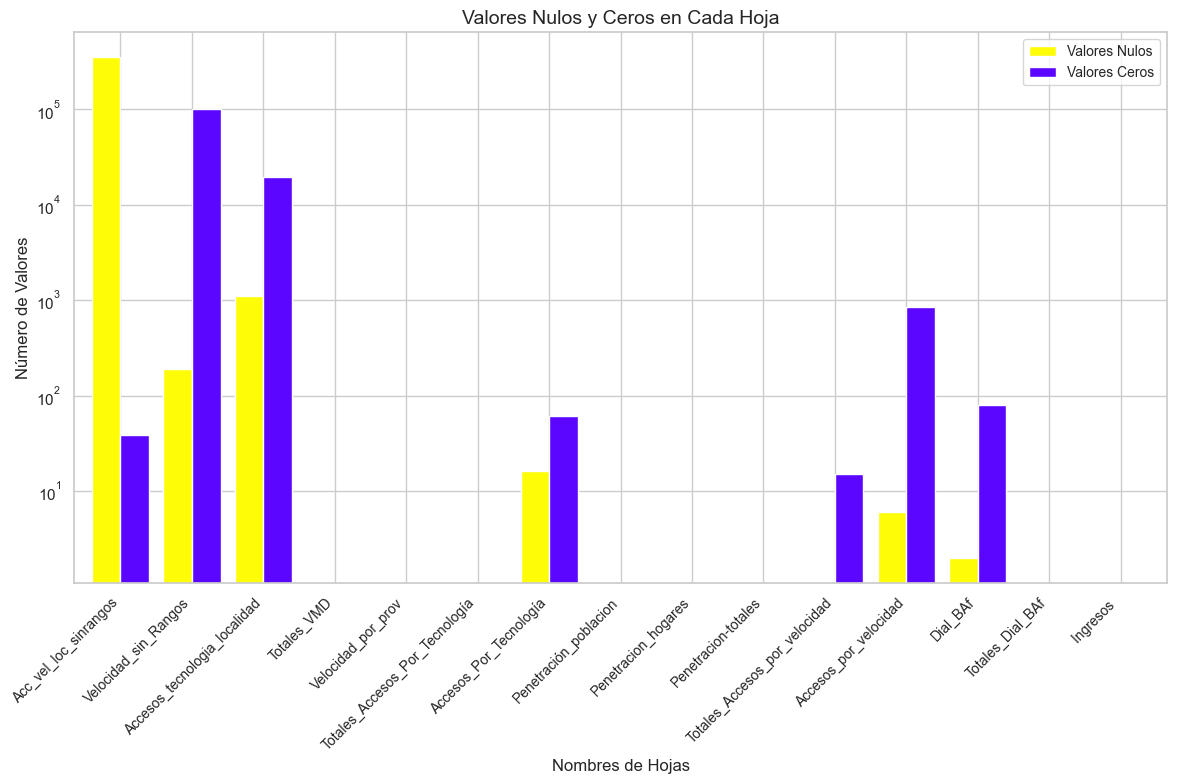

In [43]:

# Crear un DataFrame para almacenar la cantidad de nulos y ceros por hoja
conteo_nulos_y_ceros = pd.DataFrame(index=dfs.keys(), columns=['valores_nulos', 'valores_ceros'])

# Calcular los valores nulos y ceros para cada DataFrame
for nombre_hoja, df in dfs.items():
    conteo_nulos_y_ceros.loc[nombre_hoja, 'valores_nulos'] = df.isnull().sum().sum()
    conteo_nulos_y_ceros.loc[nombre_hoja, 'valores_ceros'] = (df == 0).sum().sum()

# Estilo de seaborn
sns.set(style="whitegrid")

# Crear un gráfico de barras con colores diferenciados
fig, ax = plt.subplots(figsize=(12, 8))

# Graficar valores nulos y ceros
conteo_nulos_y_ceros.plot(kind='bar', ax=ax, color=['#FEFD07', '#5B06FF'], width=0.8)

# Personalizar el gráfico
plt.xlabel('Nombres de Hojas', fontsize=12)
plt.ylabel('Número de Valores', fontsize=12)
plt.title('Valores Nulos y Ceros en Cada Hoja', fontsize=14)
plt.yscale('log')  # Escala logarítmica
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(['Valores Nulos', 'Valores Ceros'], fontsize=10)
plt.tight_layout()

# Mostrar gráfico
plt.show()


In [44]:
conteo_nulos_y_ceros.T 

,Acc_vel_loc_sinrangos,Velocidad_sin_Rangos,Accesos_tecnologia_localidad,Totales_VMD,Velocidad_por_prov,Totales_Accesos_Por_Tecnología,Accesos_Por_Tecnología,Penetración_poblacion,Penetracion_hogares,Penetracion-totales,Totales_Accesos_por_velocidad,Accesos_por_velocidad,Dial_BAf,Totales_Dial_BAf,Ingresos
valores_nulos,351902,192,1120,0,0,0,16,0,0,0,0,6,2,0,0
valores_ceros,39,100551,19350,0,0,0,61,0,0,0,15,840,80,0,0


A primera vista la gráfica llama la atencion, ya que  `Acc_vel_loc_sinrangos` eclipsa por completo a alos otros Dataframes podríamos pensar que que estos se tratan en realidad de "ceros" y que no sabemos si esto se deben a valores faltantes o no, pero si vemos al Dataframe de manera detenida, nos daremos cuenta de que si hay "ceros" dentro de este, distintos a los valores nulos, por lo que deberemos asumir que si se trata de valores faltantes. Sabiendo esto, evitaremos hacer análisis sobre  `Acc_vel_loc_sinrangos`, por la gran falta de información son la que esta cuenta.


Utilizamos una escala logarítmica para visualizar los valores nulos y ceros debido a la gran disparidad en los datos. En gráficos con una amplia gama de valores, las diferencias entre las magnitudes pueden ser difíciles de interpretar, especialmente cuando algunos valores son mucho mayores que otros. Tambien vale la pena resaltar el hecho de que las r primeras tablas de nuestro conteo tienen muchos más nulos y ceros que las demás, esto se debe principalmente a la cantidad de registros, y sumado a esto el "tipo de registro" de las mismas, el cual podríamos decir que es más "volatil", queriendo referirme con esto a que los tipos de datos que albergan están mucho más distribuidos y hay una mayor variabilidad en los mismos.

### Duplicados:

In [45]:
# Crear un DataFrame para almacenar la cantidad de duplicados por hoja
conteo_duplicados = pd.DataFrame(index=dfs.keys(), columns=['valores_duplicados'])

# Calcular los valores duplicados para cada DataFrame
for nombre_hoja, df in dfs.items():
    conteo_duplicados.loc[nombre_hoja, 'valores_duplicados'] = df.duplicated().sum()

conteo_duplicados.T

,Acc_vel_loc_sinrangos,Velocidad_sin_Rangos,Accesos_tecnologia_localidad,Totales_VMD,Velocidad_por_prov,Totales_Accesos_Por_Tecnología,Accesos_Por_Tecnología,Penetración_poblacion,Penetracion_hogares,Penetracion-totales,Totales_Accesos_por_velocidad,Accesos_por_velocidad,Dial_BAf,Totales_Dial_BAf,Ingresos
valores_duplicados,0,0,279,0,0,0,0,0,0,0,0,0,0,0,0


`df.duplicated()` es una función de Pandas que se utiliza para identificar filas duplicadas en un DataFrame. Esta función devuelve una serie booleana del mismo tamaño que el DataFrame, donde True indica que la fila es un duplicado y False indica que no lo es. Como podemos ver una única tabla cuenta con valores duplicados, Eliminar estos realmente es parte del proceso de transformación, pero como este puede afectarnos y es sencillo de solucionar, los eliminaremos. Considero que graficarlos no tiene mucho sentido, ya que solo una de las tablas cuenta con duplicados.

In [46]:
DF_Accesos_tecnologia_localidad = DF_Accesos_tecnologia_localidad.drop_duplicates()
DF_Accesos_tecnologia_localidad.duplicated().sum()

0

### Outliers

Un outlier (valor atípico) es un dato que se encuentra significativamente alejado de la mayoría de los datos en un conjunto. Estos valores pueden indicar variabilidad extrema, errores de medición, o eventos poco comunes. la manera principal de identificarlos es utilizando el "IQR"

C:\Users\fede\AppData\Local\Temp\ipykernel_8808\3415250298.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_outliers.index, y='valores_outliers', data=conteo_outliers, palette='viridis')


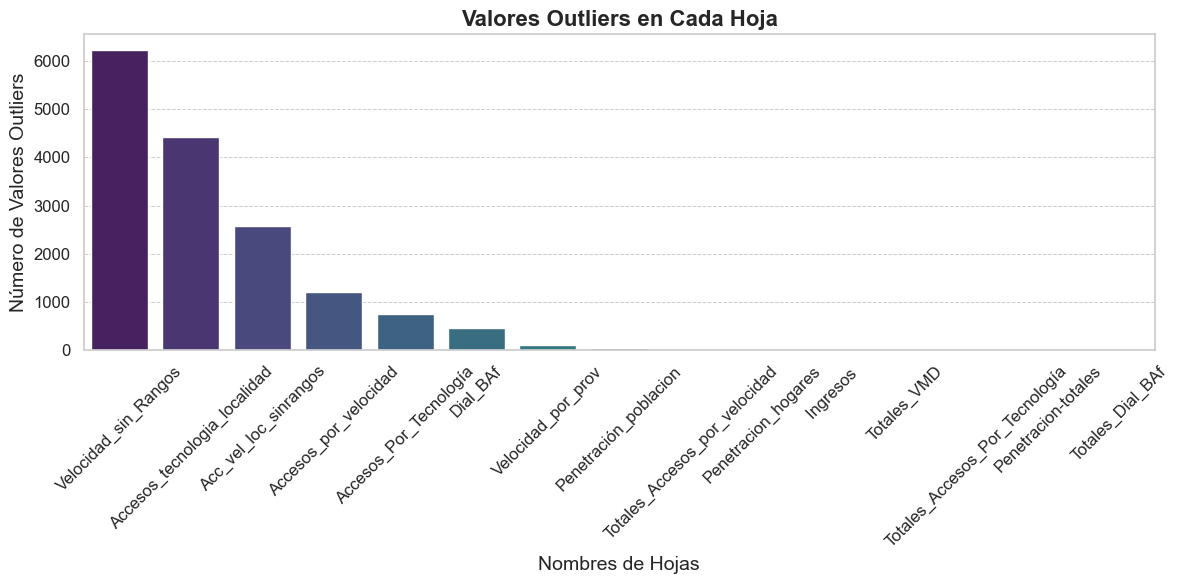

In [47]:
# Función para identificar outliers usando el rango intercuartílico (IQR)
def identificar_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    outliers = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))
    return outliers

# Crear un DataFrame para almacenar la cantidad de outliers por hoja
conteo_outliers = pd.DataFrame(index=dfs.keys(), columns=['valores_outliers'])

# Calcular los valores outliers para cada DataFrame
for nombre_hoja, df in dfs.items():
    outliers = identificar_outliers(df.select_dtypes(include=[np.number]))  # Solo numéricos
    conteo_outliers.loc[nombre_hoja, 'valores_outliers'] = outliers.sum().sum()

# Ordenar los valores outliers
conteo_outliers.sort_values('valores_outliers', ascending=False, inplace=True)
# Graficar los valores outliers
plt.figure(figsize=(12, 6))
sns.barplot(x=conteo_outliers.index, y='valores_outliers', data=conteo_outliers, palette='viridis')

# Ajustes estéticos
plt.xlabel('Nombres de Hojas', fontsize=14)
plt.ylabel('Número de Valores Outliers', fontsize=14)
plt.title('Valores Outliers en Cada Hoja', fontsize=16, weight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()

In [48]:
conteo_outliers.T

,Velocidad_sin_Rangos,Accesos_tecnologia_localidad,Acc_vel_loc_sinrangos,Accesos_por_velocidad,Accesos_Por_Tecnología,Dial_BAf,Velocidad_por_prov,Penetración_poblacion,Totales_Accesos_por_velocidad,Penetracion_hogares,Ingresos,Totales_VMD,Totales_Accesos_Por_Tecnología,Penetracion-totales,Totales_Dial_BAf
valores_outliers,6237,4427,2580,1202,762,457,105,41,22,20,6,4,3,0,0


Creo que comparar la cantidad de outliers por tabla no tiene mucho sentido, ya que cada una de estas tiene variables, propósitos, distribuciones, escalas y contextos completamente diferentes, sin embargo al formar parte de los análisis "básicos" y obligatorios necesitamos conocer esta estadística en todas las tablas y esta  es la manera más simple, coherentes y cohesiva de hacerlo.

---

## Análisis específicos:

Ya hemos realizado análisis generales, los cuales nos sirven como una introducción a nuestro EDA. A partir de ahora trabajaremos con las tablas de manera individual(o subgrupos de estas). Llegada esta parte, deberemos empezar a disernir sobre que tablas realizaremos los diferentes análisis, para esto deberemos utilizar el diccionario de datos y pensar sobre cual es el objetivo del mismo. Sin duda uno de estos es generar al menos dos KPI.

Después de un análisis meticuloso sobre el diccionario de datos decidí quedarme con los siguientes subconjuntos:



## Velocidad 

muestran información relevante sobre las diferentes velocidades en Mbps (MegaBytes por segundo) en Argentina.
Tablas:
+ Velocidad_sin_Rangos 
+ Acc_vel_loc_sinrangos
+ Accesos_por_velocidad
+ Velocidad_por_prov


In [49]:

#para evitar problemas a posteriori rellenamos el DF con valores NaNs por ceros
DF_Acc_vel_loc_sinrangos = DF_Acc_vel_loc_sinrangos.fillna(0)

El primer analisis sobre las tablas será descifrar para cada provincia el porcentaje de accesos para cada velocidad.

In [50]:
# Para este análisis, no nos interesa el hisórico de los datos, unicamente su version más actual, en este caso el trimestre 1 del año 2024.
DF_Acc_vel_loc_sinrangos_filtrado = DF_Accesos_por_velocidad[(DF_Accesos_por_velocidad['Año'] == 2024) & (DF_Accesos_por_velocidad['Trimestre'] == 1)]

#para mejorar la legibilidad del mismo vamos a mostrar los valores como porcentajes.

# Seleccionamos las columnas numéricas que usaremos en el análisis
columnas_numericas = DF_Acc_vel_loc_sinrangos_filtrado.columns[DF_Acc_vel_loc_sinrangos_filtrado.dtypes != 'object']
columnas_numericas = columnas_numericas[columnas_numericas != 'Total']
columnas_numericas = columnas_numericas[columnas_numericas != 'Año']
columnas_numericas = columnas_numericas[columnas_numericas != 'Trimestre']


# Calcula el porcentaje en relación a la columna 'Total'
for columna in columnas_numericas:
    DF_Acc_vel_loc_sinrangos_filtrado[columna] = ((DF_Acc_vel_loc_sinrangos_filtrado[columna] / DF_Acc_vel_loc_sinrangos_filtrado['Total']) * 100).round(2)

C:\Users\fede\AppData\Local\Temp\ipykernel_8808\1956795464.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Acc_vel_loc_sinrangos_filtrado[columna] = ((DF_Acc_vel_loc_sinrangos_filtrado[columna] / DF_Acc_vel_loc_sinrangos_filtrado['Total']) * 100).round(2)


In [51]:

DF_Acc_vel_loc_sinrangos_filtrado = DF_Acc_vel_loc_sinrangos_filtrado.drop(['Año', 'Trimestre'], axis=1)
DF_Acc_vel_loc_sinrangos_filtrado 

,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,Buenos Aires,0.52,0.45,4.38,4.62,4.79,2.11,80.65,2.48,5044557.0
1,Capital Federal,0.03,0.36,1.98,3.42,2.48,0.40,91.33,0.00,1504711.0
2,Catamarca,0.09,0.23,3.83,4.57,5.61,2.43,83.13,0.09,74933.0
3,Chaco,0.15,0.27,9.10,5.81,3.56,3.68,74.98,2.45,155543.0
4,Chubut,0.07,0.63,25.68,18.68,13.49,11.87,19.83,9.75,170676.0
5,Córdoba,0.01,0.74,10.20,8.11,4.35,2.77,72.46,1.36,1082199.0
6,Corrientes,0.04,1.70,11.80,10.47,4.86,1.26,65.90,3.95,157894.0
7,Entre Ríos,0.04,1.45,11.66,17.35,5.44,2.44,56.92,4.71,296552.0
8,Formosa,0.14,0.25,35.29,17.42,6.66,0.44,39.33,0.48,62718.0
9,Jujuy,0.05,1.07,12.68,9.56,24.18,0.23,50.56,1.67,118053.0


Solo con visualizar la tabla podemos darnos una buena idea, para provincias como Bs As la gran mayoría de accesos se dan en `+30 Mbps`, mientras que en provincias con un numero total de accesos menor, como por ejemplo tierra del fuego, `+30 Mbps` representa tan solo el 25% de los accesos. Hay que resaltar que la *distribución* varía mucho en cada provincia. En el siguiente gráfico veremos el promedio de los porcentajes en todas las provincias para hacernos una mejor idea del porcentaje de accesos para cada velocidad 

C:\Users\fede\AppData\Local\Temp\ipykernel_8808\4122090627.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_promedios.index, y='Promedio', data=df_promedios, palette='viridis')


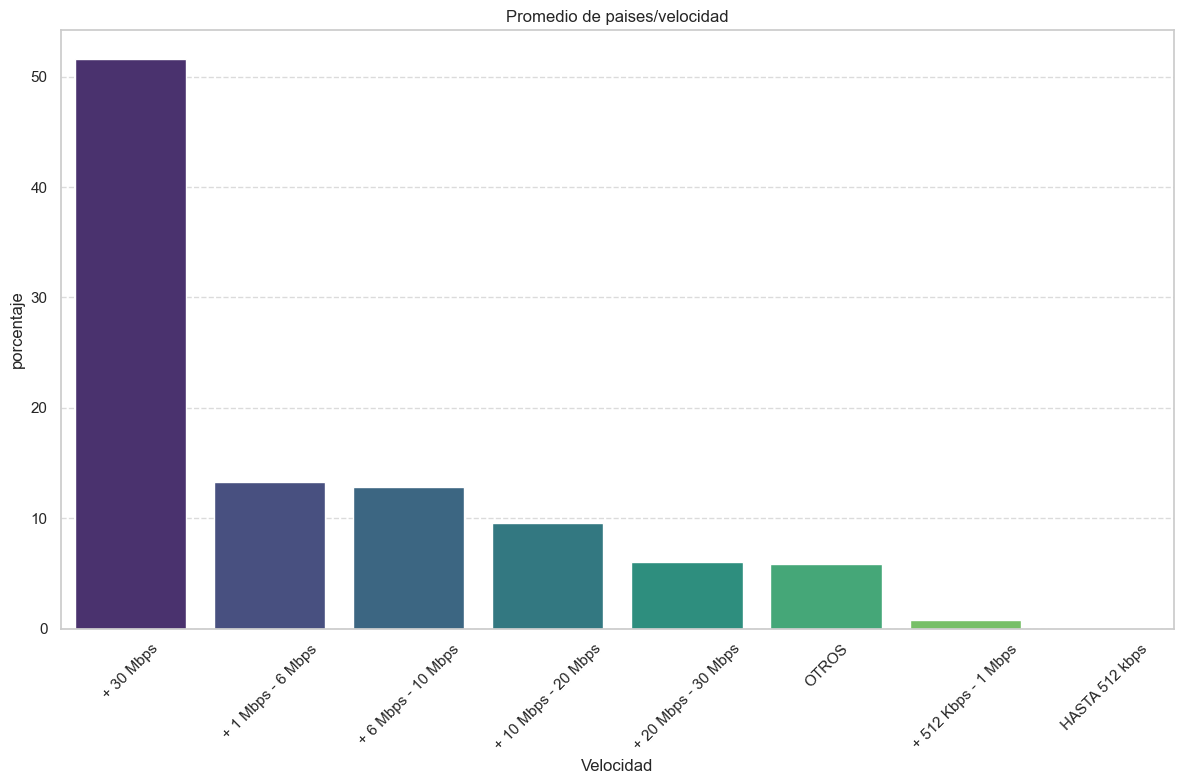

In [52]:
# Ordena el DataFrame para una visualización más clara
df_promedios = df_promedios.sort_values(by='Promedio', ascending=False)

plt.figure(figsize=(12, 8))

# Ajuste del gráfico
ax = sns.barplot(x=df_promedios.index, y='Promedio', data=df_promedios, palette='viridis')


plt.title('Promedio de paises/velocidad')
plt.xlabel('Velocidad')
plt.ylabel('porcentaje')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [53]:
df_promedios

,Promedio
+ 30 Mbps,51.616667
+ 1 Mbps - 6 Mbps,13.276250
+ 6 Mbps - 10 Mbps,12.845000
+ 10 Mbps - 20 Mbps,9.528750
+ 20 Mbps - 30 Mbps,6.004167
OTROS,5.854583
+ 512 Kbps - 1 Mbps,0.796667
HASTA 512 kbps,0.077083


## Distribución 

en el siguiente gráfico veremos la distribución individual de cada una de las provincias. Dividimos el gráfico en dos para poder visualizarlo mejor, ya que al ser muchas provincias, de lo contrario, es complicado seguir el movimiento de cada provincia.

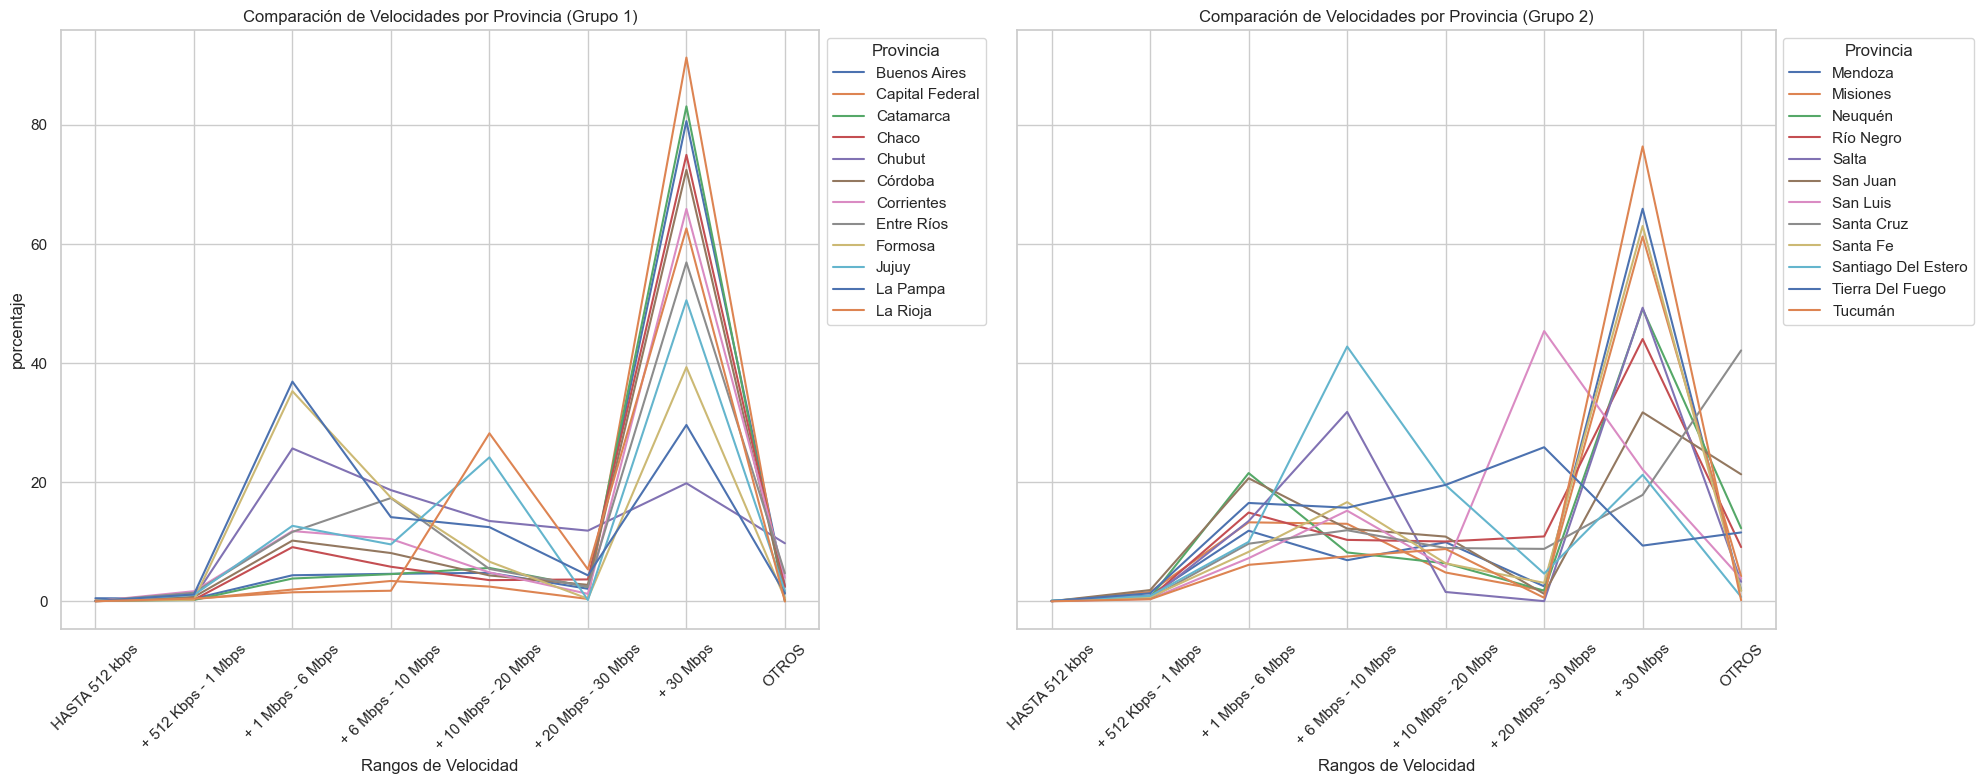

In [63]:
# Series que se van a graficar (todas excepto 'Total')
series_a_graficar = ['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps',
                     '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps',
                     '+ 30 Mbps', 'OTROS']

# Transponer el DataFrame para tener las velocidades en el eje X
df_transpuesto = DF_Acc_vel_loc_sinrangos_filtrado[series_a_graficar].T

# Dividir las provincias en dos grupos
num_provincias = len(df_transpuesto.columns)
punto_medio = num_provincias // 2
primer_grupo_provincias = df_transpuesto.columns[:punto_medio]
segundo_grupo_provincias = df_transpuesto.columns[punto_medio:]

# Crear la figura y los ejes para subplots
figura, ejes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)

# Gráfica para el primer grupo de provincias
for provincia in primer_grupo_provincias:
    sns.lineplot(x=df_transpuesto.index, y=df_transpuesto[provincia], label=provincia, ax=ejes[0])

ejes[0].set_xlabel('Rangos de Velocidad')
ejes[0].set_ylabel('porcentaje')
ejes[0].set_title('Comparación de Velocidades por Provincia (Grupo 1)')
ejes[0].legend(title='Provincia', loc='upper left', bbox_to_anchor=(1, 1))
ejes[0].tick_params(axis='x', rotation=45)

# Gráfica para el segundo grupo de provincias
for provincia in segundo_grupo_provincias:
    sns.lineplot(x=df_transpuesto.index, y=df_transpuesto[provincia], label=provincia, ax=ejes[1])

ejes[1].set_xlabel('Rangos de Velocidad')
ejes[1].set_title('Comparación de Velocidades por Provincia (Grupo 2)')
ejes[1].legend(title='Provincia', loc='upper left', bbox_to_anchor=(1, 1))
ejes[1].tick_params(axis='x', rotation=45)

# Ajustar diseño para que los gráficos no se superpongan
plt.tight_layout()

# Mostrar la gráfica
plt.show()


## comparacion de velocidades por año 

para ver los avances en cuanto a velocidades a lo largo del tiempo , vamos a comparar el años 2017( el más antiguo del cual tenemos información) con el 2024

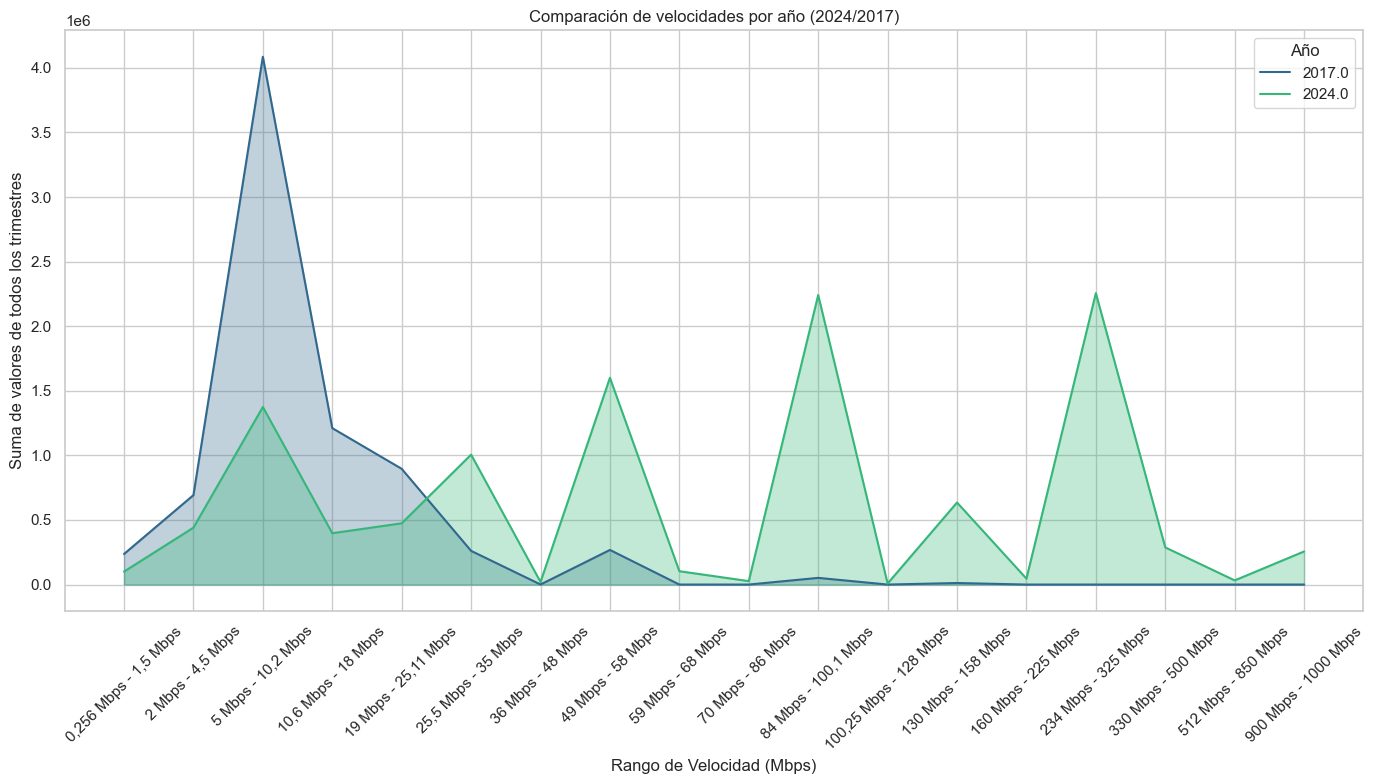

In [66]:
# Paso 1: Agrupar por Año y sumar los trimestres
df_por_año = DF_Velocidad_sin_Rangos.groupby('Año').sum()

# Paso 2: Filtrar solo los años 2017 y 2024
df_años_filtrados = df_por_año.loc[df_por_año.index.isin([2017, 2024])]

# Paso 3: Filtrar solo las columnas con velocidades entre 0 Mbps y 1000 Mbps
df_velocidades_filtrado = df_años_filtrados.loc[:, '0,256 Mbps':'1000 Mbps']

# Paso 4: Agrupar las columnas de 10 en 10 y sumar
df_combinado = pd.DataFrame()

# Crear un nuevo DataFrame con las sumas de cada grupo de 10 columnas
columnas = df_velocidades_filtrado.columns
for i in range(0, len(columnas), 10):
    columnas_seleccionadas = columnas[i:i+10]
    df_combinado[f'{columnas_seleccionadas[0]} - {columnas_seleccionadas[-1]}'] = df_velocidades_filtrado[columnas_seleccionadas].sum(axis=1)

# Paso 5: Transponer el DataFrame para que las velocidades estén en el eje X y los años en el eje Y
df_transpuesto = df_combinado.T

# Paso 6: Crear la gráfica con una paleta de colores gradual
plt.figure(figsize=(14, 8))
colores = sns.color_palette("viridis", n_colors=len(df_transpuesto.columns))

# Graficar cada año con relleno debajo de la línea
for i, año in enumerate(df_transpuesto.columns):
    plt.plot(df_transpuesto.index, df_transpuesto[año], label=f'{año}', color=colores[i])
    plt.fill_between(df_transpuesto.index, df_transpuesto[año], color=colores[i], alpha=0.3)

plt.xlabel('Rango de Velocidad (Mbps)')
plt.ylabel('Suma de valores de todos los trimestres')
plt.title('Comparación de velocidades por año (2024/2017)')
plt.legend(title='Año')
plt.xticks(rotation=45)
plt.tight_layout()  # Ajustar el diseño para que no se corte
plt.show()


Como podemos ver, a lo largo del tiempo, la cantidad de usuarios con mayor velocidad a aumentado significativamente

# Tecnologías

las diferentes tecnologías a comparar son:

ADSL  -	Cablemodem	- Fibra óptica	- Wireless	- Otros

### tablas:

+ Accesos_tecnologia_localidad
+ Accesos_Por_Tecnología
+ Totales_Accesos_Por_Tecnología

Lo primero que haremos será comparar el numero de accesos por tecnología por cada año

# Penetracion

tablas:

# Ingresos:
sin duda es una de las tablas más importantes para nuestro análisis, muestra los Ingresos generados por los servicios de internet en miles de pesos. Dividido en trimestres

## Conclusion:


---

# KPIs

### Primer KPI:
Aumentar en un 2% el acceso al servicio de internet para el próximo trimestre, cada 100 hogares, por provincia.


C:\Users\fede\AppData\Local\Temp\ipykernel_8808\4046416430.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_actual['Accesos por cada 100 hogares_proximo'] = df_actual['Accesos por cada 100 hogares'] * 1.02
C:\Users\fede\AppData\Local\Temp\ipykernel_8808\4046416430.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_actual['KPI'] = ((df_actual['Accesos por cada 100 hogares_proximo'] - df_actual['Accesos por cada 100 hogares']) / df_actual['Accesos por cada 100 hogares']) * 100
C:\Users\fede\AppDat

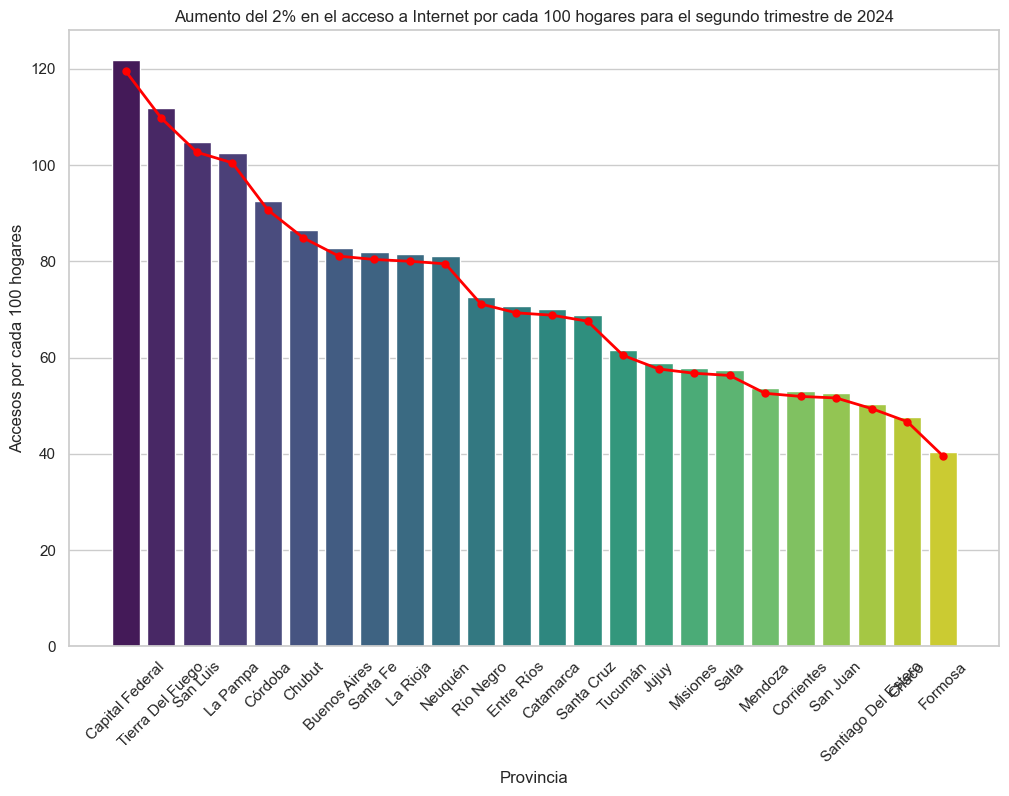

In [56]:
# Cambiamos el nombre del DF para mejorar la legibilidad del codigo, y no modificarlo directamente
df = DF_Penetracion_hogares

# Filtramos los datos del primer trimestre de 2024
año_actual = 2024
trimestre_actual = 1

df_actual = df[(df['Año'] == año_actual) & (df['Trimestre'] == trimestre_actual)]

# Calculamos el KPI para cada provincia, asumiendo un aumento del 2% para el segundo trimestre
df_actual['Accesos por cada 100 hogares_proximo'] = df_actual['Accesos por cada 100 hogares'] * 1.02
df_actual['KPI'] = ((df_actual['Accesos por cada 100 hogares_proximo'] - df_actual['Accesos por cada 100 hogares']) / df_actual['Accesos por cada 100 hogares']) * 100

# Ordenamos los datos por 'Accesos por cada 100 hogares' de mayor a menor
df_actual = df_actual.sort_values(by='Accesos por cada 100 hogares', ascending=False)

# Graficamos el KPI
plt.figure(figsize=(12, 8))
sns.barplot(x='Provincia', y='Accesos por cada 100 hogares_proximo', data=df_actual, palette='viridis')

# Añadimos la línea con los valores actuales
plt.plot(df_actual['Provincia'], df_actual['Accesos por cada 100 hogares'], color='red', marker='o', linestyle='-', linewidth=2, markersize=5, label='Accesos actuales')

# Añadimos etiquetas y título
plt.xlabel('Provincia')
plt.ylabel('Accesos por cada 100 hogares')
plt.title('Aumento del 2% en el acceso a Internet por cada 100 hogares para el segundo trimestre de 2024')

# Rotamos las etiquetas del eje x para una mejor visualización
plt.xticks(rotation=45)
# Mostramos el gráfico
plt.show()

### Segundo KPI: